# Unsupervised Learning : 
Class of machine learning for discovering patterns in Data. 

data to use: iris/seeds data/ pidmont wine data/ fish measurement data: http://jse.amstat.org/jse_data_archive.htm
 
#### Type of unsupervised learning: 
- 1- Clustring (clustring customers based on their history of purchases) 
  - Using KMeans.
  - Using Hierarchical clustering with dendrogram.
  - Using TSNE.

- 2- Dimension reduction (finds pattern in data and uses this patterns to reexpress it in a compressed form).

## 1- Clustring : K-means clustring Algorithm

K-mean clustring finds a specified number of clusters in the samples. 

Steps to clustering : 
- Import choosed model (KMeans) and fit, predict.
- predict on test data
- visualizing the clusters
- evaluate the accuracy/ performance. : Cross tabulation with pandas
- measure the quality of clustering without looking at species group (this measure of quality can then be used to make an informed choice about the number of clusters to look for) 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# loading the iris dataSet as a sample
data = load_iris()
samples = data.data


In [2]:
# importing K-mean 
from sklearn.cluster import KMeans

# Specifying the number of clusters to find
model = KMeans(n_clusters = 3)

#fitting the data
model.fit(samples)

# predicting the labels : 
labels = model.predict(samples)
print(labels)

# lables return a cluster label for each sample, indicating to which cluster a sample belongs.
# To cluster new lables to new samples we only pass the new_samples to model.predict(new_samples) without the need
# to fit the model, BECAUSE Kmeans rembembers the average/ mean THE CENTROIDS of each clustered samples and clusters 
# new_samples based on the centroids. (if the new sample has a centroid close to the clusted samples, it belong to that cluster)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


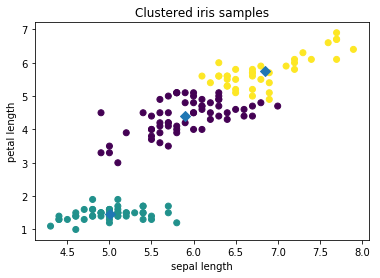

The scatter suggests that there are 3 diffrent clusters, n_clusters =3


In [15]:
# make a scatter plot to see cluters : 

#it is not easy to inspect the clustering by just looking at the printed labels. 
#A visualization would be far more useful. 

# sepal length
xs = samples[:,0] 

# petal length
ys = samples[:,2]

# scatter plot 
plt.scatter(xs, ys, c=labels)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('Clustered iris samples')

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y, marker='D', s=50)

plt.show()

print('The scatter suggests that there are 3 diffrent clusters, n_clusters =3')

### Evaluating a clustering : 

how can you be sure that 3 clusters is the correct choice? 
In other words, how can you evaluate the quality of a clustering?

#### Solution 1: comparing the clusters with iris species: Cross tabulation Clusters vs species. (Usually in clustering problems we don't have target grouped)
Cross tabulation provides great insights into which sort of samples are in wich cluster


#### Solution 2: Measuring clustring quality using inertia & Choosing n_clusters : 

A good clustering has tight clusters and the samples in each cluster are bunched together.
The KMeans model uses inertia to cluster new samples. 
inertia measures how spread out the samples are from the centeroids of its cluster, the smaller the inertia the better. KMeans attemps to minimize the inertia when choosing clusters.


**Choosing n_clusters:** To choose a good number of clusters for a dataset using the k-means inertia graph.(ellbow point)

In [14]:
#### Solution 1: comparing the clusters with iris species: Cross tabulation Clusters vs species. 

df = pd.DataFrame({'Labels': labels, 'Species': data.target})

#Cross tabulation Clusters vs species
cross_tab = pd.crosstab(df['Labels'], df['Species'])
cross_tab.columns = data.target_names
cross_tab.columns.name = 'species'
cross_tab 



species,setosa,versicolor,virginica
Labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


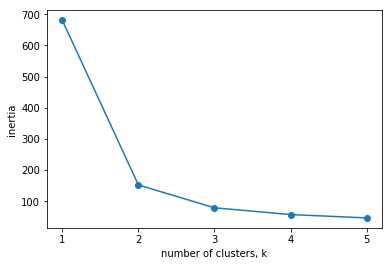

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.


In [19]:
#### Solution 2: Measuring clustring quality and

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters= k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

print('The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.')




### Transforming features for better clusterings: 

in KMeans Clustering the variance of the data features influences directly the clustering algorithm (example of pidmont wine data). To solve this problem, the data needs to be transformed so that the features have equal variance, this can be achieved with **standarScaler(transforms each feature to have mean 0 and variance 1)**. the resulting standerized features can be very informative. 

other preprocessing available : MaxAbsScaler/ Normalizer

- The Normalizer :  separately transform each feature to a relative scale before the clustering begins. 

N.B : standarScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample independently of the other.

In [21]:
# Example of standarScaler 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the samples
scaler.fit(samples)

#Transform the samples
samples_scaled = scaler.transform(samples)

## StandarScaler and clustering using Sklearn Pipeline: 

data flows through pipeline steps automaticaly

In [24]:
# # Pipeline example: using wine data because the iris data give a good result and it doesn't have variance measures.

# # prefrom imports : 
# #from sklearn.preprocessing import StandardScaler
# #from sklearn.cluster import KMeans 
# from sklearn.pipeline import make_pipeline

# feature_scaler = StandardScaler()
# model = KMeans(n_clusters= 3)

# #building pipeline steps
# pipeline = make_pipeline(feature_scaler, model)

# #fitting the pipeline to the data 
# pipeline.fit(wine_samples)

# # predicting clusters
# predicted_clusters = pipeline.predict(samples)
# print(predicted_clusters)

# # Evaluating the cluster using cross tabulation

# df2 = pd.DataFrame({'Labels': predicted_clusters, 'wine_varieties':data.target})
# cross_tabulation = pd.crosstab(df2['Labels'], df2['wine_varieties'])
# cross_tabulation

## 2- Visualization with hierarchical clustering and t-SNE

1/ t-SNE : creates a 2D map of dataset : conveys useful infomation about the proximity of the samples to one other.
hierarchical clustering : arranges samples into a hierarchical of clusters that are contained in one another and form a hierarchy. It's visualizations that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.

2- Types of hierarchical clustering: 
- agglomerative clustering.
- divisive clustering.

#### 1- Visualizing hierarchy with dendrogram & extracting clusters : agglomerative hierarchical clustering

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.


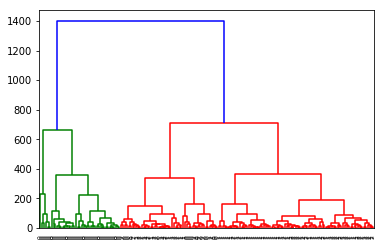

In [47]:
# building dendrogram : hierarchical clustering with scipy

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_wine

#loading the data
wine_data = load_wine()
wine = wine_data.data

#liking using complete or single method
mergings_ = linkage(wine, method ='complete')

#dendrogram :
dendrogram(mergings_, labels = wine_data.target, leaf_rotation= 90, leaf_font_size= 6)
plt.show()

#### Cluster labels in hierarchical clustering: 

Extracting clusters from intermediate stage of a hirarchical clustering, the cluster labels for this intermediate clusterings can then be used in further computations such as a cross tabulation, just like cluster label from KMeans.

#### Extracting cluster labels from dendrogram
The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using f cluster 

In [55]:
#### Extracting cluster labels : 

from scipy.cluster.hierarchy import  fcluster

labels = fcluster(mergings_, 400, criterion = 'distance')

pairs = pd.DataFrame({'labels': labels, 'wine_group': wine_data.target})
#cluster label in scipy start from 1
#print(pairs.sort_values('labels'))

# Create crosstab: ct
ct = pd.crosstab(pairs['labels'], pairs['wine_group'])

# Display ct
ct

wine_group,0,1,2
labels,,,
1,6,0,0
2,37,0,0
3,16,15,21
4,0,56,27


#### 2-  t-SNE for 2-dimensional maps:  tool for visualizing high dimensional data.
 
T-distributed Stochastic Neighbor Embedding : maps samples from their high-dimensional space into a 2 or 3 dimensional space o they can be visualized. it represents aproximativly the distance btw samples.


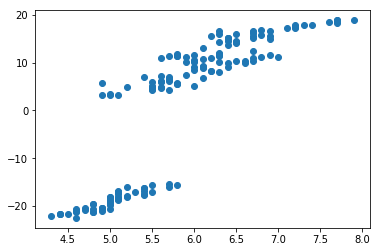

In [57]:
from sklearn.manifold import TSNE 

model = TSNE(learning_rate = 100)

# fit transform the model :  
transformed = model.fit_transform(samples)

xy = transformed[:, 0]
xy = transformed[:, 1]

plt.scatter(xs, xy)

plt.show()

## 3- Dimension reduction : Decorrelating data and dimension reduction

Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. 

how it works:
Dimension reduction : finds pattern in data and uses this patterns to reexpress it in a compressed form, by removing and discarding noisy features that cause big problems in supervised learning and classification . This make subsequent computattion with the data much more efficient especially for big datasets. 

Dimension reduction : using same data with less features.

## Principle Component Analysis PCA : fundamental of dimension reduction. 

PCA preforms dimension reduction into 2 steps: 
- Decorrlation.
- 

#### First step :  Decorrelation 
in  this step, PCA rotates the samples so that they are aligned with the coordinate axes, and shift the samples so that they have mean 0. 

##### Intrinsic dimension : 
the intrinsic dimension of a dataset is the number of features recquired to apprximate it. it informs dimension reduction because it tell us how much a data can be compressed(is the number of PCA features that have significant variance)



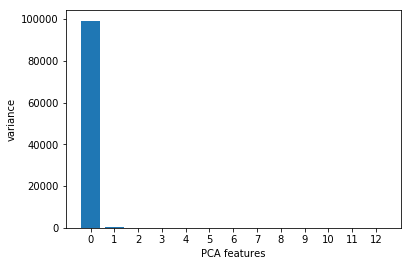

the freature 0 and one have a high variance that we can choose to reduce the dimention of the data
(178, 2)


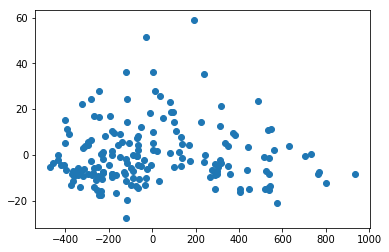

In [98]:
## Decorrelation 

from sklearn.decomposition import PCA
from scipy.stats import pearsonr


# import model
model = PCA()

# fit the model to lean
model.fit(wine)

# transform the data. 
transformed = model.transform(wine)

#print('columns of the data correspond to PCA features, and features are often correlated')
#print(transformed)


### Intrinsic dimension :  

# import model and data(done already iris data)


model.fit(wine)
features = range(model.n_components_)
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.show()

print('the freature 0 and one have a high variance that we can choose to reduce the dimention of the data')



## choosing one pca feature to represent all the data 
# import model
model = PCA(n_components=2)

# fit the model to lean
model.fit(wine)

# transform the data. 
transformed = model.transform(wine)

#new shape of the data 
print(transformed.shape)


#visualizing the scatter of the data after it has been reduced to 2 features
f1 = transformed[:,0]
f2 = transformed[:,1]

#the color needs to be specified by the type of wine
plt.scatter(f1,f2,)
plt.show()


In [ ]:
## The first principal component

## The first principal component of the data is the direction in which the data varies the most. 
## In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the iris samples, 
##and represent it as an arrow on the scatter plot.

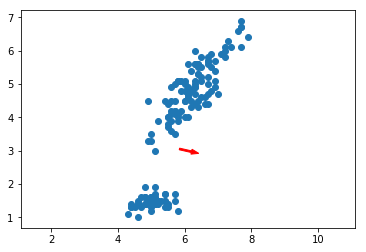

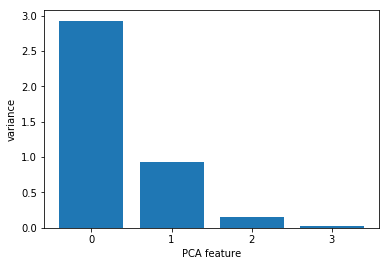

 It looks like PCA features 0 and 1 have significant variance.


In [92]:
# Make a scatter plot of the untransformed points
# sepal length >>xs = samples[:,0] 
# petal length >> ys = samples[:,2]

plt.scatter(xs, ys)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(samples)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.05)

# Keep axes on same scale
plt.axis('equal')
plt.show()

## Variance of the PCA features
## what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out.

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

print(' It looks like PCA features 0 and 1 have significant variance.')

## 4- Dimension reduction : Discovering interpretable features/ Non-negative matrix factorization (NMF)

NMF models are interpretable inlike PCA but it can't be applied to any dataset, it recquires that the data features to be non negative

a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!


Ex : 

import NMF
from sklearn.decomposition import NMF

Create an NMF instance: model
model = NMF(n_components = 6)

Fit the model to articles
model.fit(articles)

Transform the articles: nmf_features
nmf_features = model.transform(articles)

Print the NMF features
print(nmf_features)

comparing results 

df = pd.DataFrame(nmf_features, index=titles)

Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])


#### Building recommender systems using NMF and cosine similarity : 

ex :  Building recommender systems using NMF that recommends new newpaper to the custumer by applying NMF to the word frequency array of the articles that the customer reads and use the NMF features.


Which articles are similar to 'Cristiano Ronaldo'?

you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

 Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

Compute the dot products: similarities
similarities = df.dot(article)

Display those with the largest cosine similarity
print(similarities.nlargest())


ex 2 : 

Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose column correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!


Recommend musical artists part II
Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

Create a DataFrame: df
df = pd.DataFrame(norm_features, index= artist_names)

Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

Compute cosine similarities: similarities
similarities = df.dot(artist)

Display those with highest cosine similarity
print(similarities.nlargest())
